# Stock market prices prediction and forecasting using Stacked LSTM

We're given the dataset to analyse and produce a Stacked LSTM model that can forecast stock prices for TATA Global Beverage's.

## Dataset
[Dataset](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)

Data is given from 2010-07-21 to 2018-09-28

Columns in the dataset:
- __Date:__ Date of the trade
- __Open:__ What was the opening price for the share that day
- __High:__ What is the highest price of the share that day
- __Low:__ What is the lowest value of the stock
- __Last:__ What is the last value of the stock
- __Close:__ What was the closing price of the stock
- __Total Trade Quantity:__ Total trade quantity of stock
- __Turnover (Lacs):__ Total turnover for the company

## Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Normalization
from sklearn.preprocessing import MinMaxScaler

## Load the dataset

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()
# training_set = dataset_train.iloc[:, 1:2].values

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [17]:
# Convert the Date into pandas DateTime format
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [18]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Visualize the data for "Open" and "High" columns

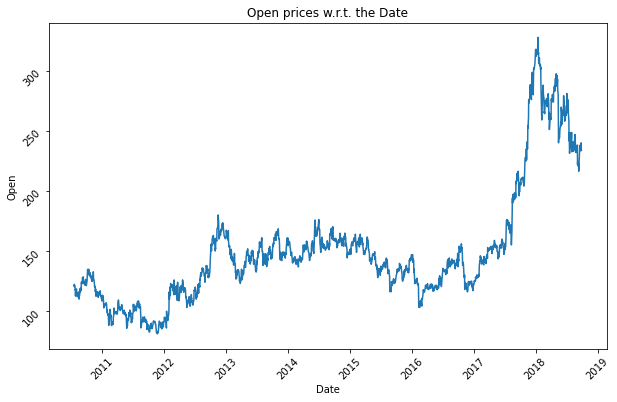

In [26]:
# Plot "Open" prices w.r.t. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Open'])
# plt.plot(data['Date'], data['High'], 'go')
plt.tick_params(rotation=45)
plt.title('Open prices w.r.t. the Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

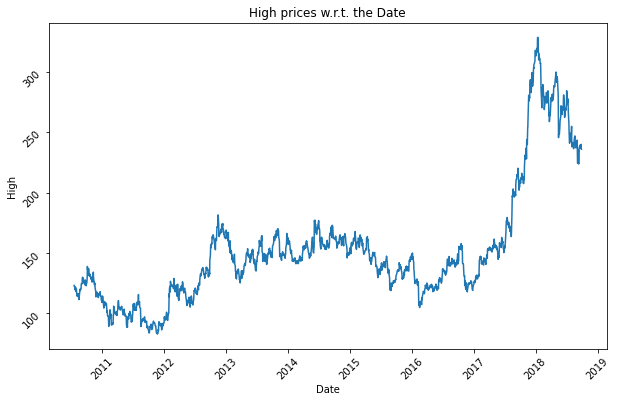

In [27]:
# Plot "High" prices w.r.t. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['High'])
plt.tick_params(rotation=45)
plt.title('High prices w.r.t. the Date')
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

## Prepare the data

From the given dataset, we select column "Open" as our training dataset.

In [28]:
# Training set for "Open" column
training_set = data.iloc[:, 1:2].values
# Check first 5 values
training_set[:5]

array([[234.05],
       [234.55],
       [240.  ],
       [233.3 ],
       [233.55]])

### Normalize the data

For the neural network, we should scale the dataset before passing as the input.

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

LSTM model requires the input in the form of a 3D array. 

Steps:
1. Create data in 60 timesteps
2. Convert into numpy array
3. Convert the array into 3D array

In [31]:
# 1. Create data in 60 timesteps
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0]) # Take 60 timesteps into X_train
    y_train.append(training_set_scaled[i, 0]) # Take 61st timestep into y_train

# 2. Convert into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# 3. Convert array into 3D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [34]:
X_train.shape

(1975, 60, 1)

In [35]:
y_train.shape

(1975,)

## Create a Stacked LSTM model

In [36]:
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'